#  Short-term synaptic plasticity
Short-term plasticity (STP) (Stevens 95, Markram 96, Abbott 97, Zucker 02, Abbott 04), <cite data-cite="granger2013">(Granger, 2013)</cite> also called dynamical synapses, refers to a phenomenon in which synaptic efficacy changes over time in a way that reflects the history of presynaptic activity. Two types of STP, with opposite effects on synaptic efficacy, have been observed in experiments. They are known as Short-Term Depression (STD) and Short-Term Facilitation (STF). STD is caused by depletion of neurotransmitters consumed during the synaptic signaling process at the axon terminal of a pre-synaptic neuron, whereas STF is caused by influx of calcium into the axon terminal after spike generation, which increases the release probability of neurotransmitters. STP has been found in various cortical regions and exhibits great diversity in properties (Markram 98, Dittman 00, Wang 06). Synapses in different cortical areas can have varied forms of plasticity, being either STD-dominated, STF-dominated, or showing a mixture of both forms.

Compared with long-term plasticity (Bi 01), which is hypothesized as the neural substrate for experience-dependent modification of neural circuit, STP has a shorter time scale, typically on the order of hundreds to thousands of milliseconds. The modification it induces to synaptic efficacy is temporary. Without continued presynaptic activity, the synaptic efficacy will quickly return to its baseline level.

Although STP appears to be an unavoidable consequence of synaptic physiology, theoretical studies suggest that its role in brain functions can be profound (see, e.g., publications in (Research Topic) and the references therein). From a computational point of view, the time scale of STP lies between fast neural signaling (on the order of milliseconds) and experience-induced learning (on the order of minutes or more). This is the time scale of many processes that occur in daily life, for example motor control, speech recognition and working memory. It is therefore plausible that STP might serve as a neural substrate for processing of temporal information on the relevant time scales. STP implies that the response of a post-synaptic neuron depends of the history of presynaptic activity, creating information that in principle can be extracted and used. In a large-size network, STP can greatly enrich the network's dynamical behaviors, endowing the neural system with information processing capacities that would be difficult to implement using static connections. These possibilities have led to significant interest in the computational functions of STP within the field of Computational Neuroscience. Please see 
[Short-term synaptic plasticity](http://www.scholarpedia.org/article/Short-term_synaptic_plasticity#Stevens95) for detail.


## Short-term plasticity model

Studies of the computational roles of STP have relied on the creation of simplified phenomenological models((Abbott 97,Markram 98,Tsodyks 98).

In the model proposed by Tsodyks and Markram (Tsodyks 98), the STD effect is modeled by a normalized variable $x$,  denoting the fraction of resources that remain available after neurotransmitter depletion. The STF effect is modeled by a utilization parameter $u$, representing the fraction of available resources ready for use (release probability). Following a spike, (i) $u$ increases due to spike-induced calcium influx to the presynaptic terminal, after which (ii) a fraction u of available resources is consumed to produce the post-synaptic current. Between spikes, $u$ decays back to zero with time constant $\tau_{F}$ and $x$ recovers to 1 with time constant $\tau_{D}$. Now the the dynamics of STP is represented by:

$$
\begin{align}
\frac{dx}{dt} & = \frac{1-x}{\tau_D} - ux \delta(t-t_{sp})  \qquad  \qquad  \text{Depression} \\
\frac{du}{dt} &= \frac{U-u}{\tau_F} + U(1-u)x \delta(t-t_{sp})  \quad \text{facilitation} \\
\frac{dI_{syn}}{dt} & = -\frac{I_{syn}}{\tau_{syn}} + ux \delta(t-t_{sp}) \quad \text{Synaptic input current}
\end{align}
$$


where $t_{sp}$ stands for __presynaptic__ (input) spikes. The interplay between the dynamics of $u$ and $x$ determines whether the joint effect of $ux$ is dominated by depression or facilitation.

## updating rule of STP model
- Upon arrival of a spike (time is $t_{sp}$，each presynaptic spike triggers modifications of the variables):
$$
\begin{align}
x &\leftarrow x*(1-u)\\
u &\leftarrow u + U*(1-u) \\
I_{syn}& \leftarrow I_{syn} + ux
\end{align}
$$

- After neuronal spiking: ($u$ returns to its basline  value $U$ with a time constant $\tau_F$, and x recovers  to its maximum value $x = 1$ with a time constant $\tau_D$). 

$$
\begin{align}
u=U+(u-U)*exp[-(t-lastupdate) / \tau_F] \\
x=1+(x-1)*exp[-(t-lastupdate)/ \tau_D] \\
I_{syn}=I_{syn}*exp[-(t-lastupdate)/ \tau_{syn}]
\end{align}
$$

Note that:

Depressing $(\tau_D>\tau_F)$ and facilitating $(\tau_F > \tau_D)$. 

### The coding for depressing situations at $(\tau_D>\tau_F)$.

Text(0.5, 0, 'Time [ms]')

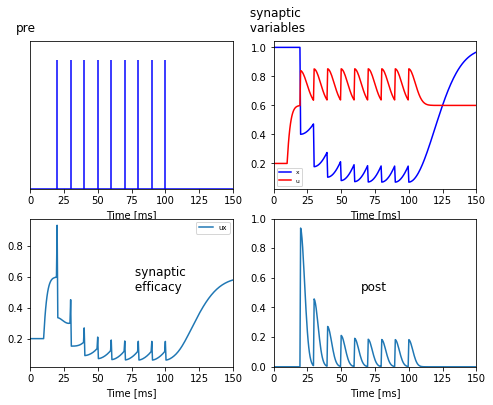

In [38]:
import numpy as np
import matplotlib.pyplot as plt
Ncells = 1
dt =  0.5#ms
#taud = 750 #ms
#tauf = 50 #ms
tuas = 20
U = 0.6
Simu_Time = 1000
taud = 750#ms
tauf = 50 #ms
#U =0.6

minvtaud = -1. /taud
minvtauf = -1. /tauf
mintauI = -1. /tuas

Nsteps = int(Simu_Time/dt)

lastSpike = np.zeros(Ncells)   # times of last spikes
interval = np.zeros(Ncells)   #  time internal between time t and last spikes times
 # recording simulatioms for all cells in whole time
dtype=np.float32 # data type 
record_x = np.zeros((Ncells,Nsteps), dtype=dtype) # depression variable 
record_u = np.zeros((Ncells,Nsteps), dtype=dtype) # faciliation variably 
record_ux = np.zeros((Ncells,Nsteps), dtype=dtype) # synaptic efficacy inteplayed  the dynamics of u and x determine
record_Isyn = np.zeros((Ncells,Nsteps), dtype=dtype) # the input synaptic currents to the post
record_tVec = np.zeros((Nsteps), dtype=dtype) # the simulation time


# initial conditions for ux, x,u
# begin main simulation loop
ux = np.zeros(Ncells)
x =np.ones(Ncells)
SynI = 0.0*np.ones(Ncells)
u = 0.2*np.ones(Ncells)
tmp = np.zeros(Ncells)
spiketimes = []
for ti in range(Nsteps):
    t = ti *dt
    for ci in range (Ncells): #  loop over neurons
        if t <=10:
            x[ci] = 1
            u[ci] =0.2
            ux[ci] = 0.2
        else:  # the updating rule after neural spikes
            interval[ci] = t -lastSpike[ci]
            u[ci] = U + (u[ci] -U) *np.exp(interval[ci]*minvtauf)
            tmp[ci] = 1.0-u[ci]
            x[ci] = 1.0 + (x[ci]-1)*np.exp(interval[ci] * minvtaud)
            ux[ci] = u[ci] * x [ci]
            SynI[ci] = SynI[ci] * np.exp(interval[ci] * mintauI)

        if 10<t <= 100 and ti% 20==0 :  # the updating rule Upon arrival of a spike
            x[ci] *=tmp[ci]
            u[ci] +=U*tmp[ci]
            ux[ci] += u[ci] * x [ci]
            SynI[ci] = SynI[ci] + ux[ci]
            lastSpike[ci] = t
            spiketimes.append(t)

        record_x[ci,ti] = x[ci]
        record_u[ci,ti] = u[ci]
        record_ux[ci,ti] = ux[ci]
        record_Isyn[ci,ti] = SynI[ci]
    
    record_tVec[ti] = t
    

x1 = np.linspace(1,5000,1000)
y1 = np.zeros(len(x1))
y1[:] = 0.5


fig=plt.figure(1,figsize=(8,6))
plt.clf()

plt.subplot(221)
for ith, trial in enumerate(np.array(spiketimes)):
    fig = plt.vlines(trial, .5, 1.8,color='blue')
plt.ylim([0.5,2.])
fig.axes.get_yaxis().set_visible(False)
plt.plot(x1,y1,color='blue')
plt.xlabel('Time [ms]')
plt.xlim([0,150])
plt.figtext( 0.1,0.9,'pre',fontsize = 'large')

plt.subplot(222)
plt.plot(record_tVec,record_x[0,:],color='blue',label='x')
plt.plot(record_tVec,record_u[0,:],color='red',label='u')
plt.legend(fontsize='6')
plt.xlim([0,150])
plt.xlabel('Time [ms]')
plt.figtext(0.5,0.9, ' synaptic \n variables',fontsize = 'large')

plt.subplot(223)
plt.plot(record_tVec,record_ux[0,:],label='ux')
plt.xlim([0,150])
plt.figtext(0.3,0.3,' synaptic \n efficacy',fontsize = 'large')
plt.legend(fontsize='x-small')
plt.xlabel('Time [ms]')

plt.subplot(224)
plt.plot(record_tVec,record_Isyn[0,:],label='Isyn')
plt.xlim([0,150])
plt.ylim([0,1])
plt.figtext(0.7,0.3,'post',fontsize = 'large')
plt.xlabel('Time [ms]')


### The coding for facilitation situations at $(\tau_D < \tau_F)$.

Text(0.5, 0, 'Time [ms]')

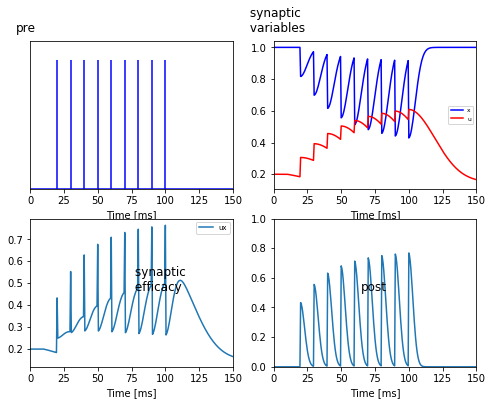

In [56]:
import numpy as np
import matplotlib.pyplot as plt
Ncells = 1
dt =  0.5#ms
#taud = 750 #ms
#tauf = 50 #ms
tuas = 20
U = 0.15
Simu_Time = 1000
taud = 50#ms
tauf = 750 #ms
#U =0.6

minvtaud = -1. /taud
minvtauf = -1. /tauf
mintauI = -1. /tuas

Nsteps = int(Simu_Time/dt)

lastSpike = np.zeros(Ncells)   # times of last spikes
interval = np.zeros(Ncells)   #  time internal between time t and last spikes times
 # recording simulatioms for all cells in whole time
dtype=np.float32 # data type 
record_x = np.zeros((Ncells,Nsteps), dtype=dtype) # depression variable 
record_u = np.zeros((Ncells,Nsteps), dtype=dtype) # faciliation variably 
record_ux = np.zeros((Ncells,Nsteps), dtype=dtype) # synaptic efficacy inteplayed  the dynamics of u and x determine
record_Isyn = np.zeros((Ncells,Nsteps), dtype=dtype) # the input synaptic currents to the post
record_tVec = np.zeros((Nsteps), dtype=dtype) # the simulation time


# initial conditions for ux, x,u
# begin main simulation loop
ux = np.zeros(Ncells)
x =np.ones(Ncells)
SynI = 0.0*np.ones(Ncells)
u = 0.2*np.ones(Ncells)
tmp = np.zeros(Ncells)
spiketimes = []
for ti in range(Nsteps):
    t = ti *dt
    for ci in range (Ncells): #  loop over neurons
        if t <=10:
            x[ci] = 1
            u[ci] =0.2
            ux[ci] = 0.2
        else:  # the updating rule after neural spikes
            interval[ci] = t -lastSpike[ci]
            u[ci] = U + (u[ci] -U) *np.exp(interval[ci]*minvtauf)
            tmp[ci] = 1.0-u[ci]
            x[ci] = 1.0 + (x[ci]-1)*np.exp(interval[ci] * minvtaud)
            ux[ci] = u[ci] * x [ci]
            SynI[ci] = SynI[ci] * np.exp(interval[ci] * mintauI)

        if 10<t <= 100 and ti% 20==0 :  # the updating rule Upon arrival of a spike
            x[ci] *=tmp[ci]
            u[ci] +=U*tmp[ci]
            ux[ci] += u[ci] * x [ci]
            SynI[ci] = SynI[ci] + ux[ci]
            lastSpike[ci] = t
            spiketimes.append(t)

        record_x[ci,ti] = x[ci]
        record_u[ci,ti] = u[ci]
        record_ux[ci,ti] = ux[ci]
        record_Isyn[ci,ti] = SynI[ci]
    
    record_tVec[ti] = t
    

x1 = np.linspace(1,5000,1000)
y1 = np.zeros(len(x1))
y1[:] = 0.5


fig=plt.figure(1,figsize=(8,6))
plt.clf()

plt.subplot(221)
for ith, trial in enumerate(np.array(spiketimes)):
    fig = plt.vlines(trial, .5, 1.8,color='blue')
plt.ylim([0.5,2.])
fig.axes.get_yaxis().set_visible(False)
plt.plot(x1,y1,color='blue')
plt.xlabel('Time [ms]')
plt.xlim([0,150])
plt.figtext( 0.1,0.9,'pre',fontsize = 'large')

plt.subplot(222)
plt.plot(record_tVec,record_x[0,:],color='blue',label='x')
plt.plot(record_tVec,record_u[0,:],color='red',label='u')
plt.legend(fontsize='6')
plt.xlim([0,150])
plt.xlabel('Time [ms]')
plt.figtext(0.5,0.9, ' synaptic \n variables',fontsize = 'large')

plt.subplot(223)
plt.plot(record_tVec,record_ux[0,:],label='ux')
plt.xlim([0,150])
plt.figtext(0.3,0.3,' synaptic \n efficacy',fontsize = 'large')
plt.legend(fontsize='x-small')
plt.xlabel('Time [ms]')

plt.subplot(224)
plt.plot(record_tVec,record_Isyn[0,:],label='Isyn')
plt.xlim([0,150])
plt.ylim([0,1])
plt.figtext(0.7,0.3,'post',fontsize = 'large')
plt.xlabel('Time [ms]')




# Reference:
* Research Topic: Neural Information Processing with Dynamical Synapses. 

* **S. Wu, K. Y. Michael Wong and M. Tsodyks**. Frontiers in Computational Neuroscience, 2013  [link](https://www.frontiersin.org/research-topics/821/neural-information-processing-with-dynamical-synapsesL) 
* **Abbott, L. F. et al** (1997). Synaptic Depression and Cortical Gain Control. Science. 275(5297): 221-224(doi:10.1126/science.275.5297.221). 
* **Abbott, L. F. and Regehr, Wade G**. (2004). Synaptic computation. Nature. 431(7010): 796-803
* **Amari, Shun-ichi** (1977). Dynamics of pattern formation in lateral-inhibition type neural fields. Biological Cybernetics. 27(2): 77-87.
* **Barak, Omri and Tsodyks, Misha** (2007). Persistent Activity in Neural Networks with Dynamic Synapses. [PLoS Computational Biology. 3(2): e35](doi:10.1371/journal.pcbi.0030104).
* **G. Bi and M. Poo**. Synaptic modification by correlated activity: Hebb’s postulate revisited. Annu. Rev. Neurosci. 24: 139–66, 2001.
* **Bourjaily, M. A. and Miller, P**. (2012). Dynamic afferent synapses to decision-making networks improve performance in tasks requiring stimulus associations and discriminations. Journal of Neurophysiology. 108(2): 513-527. 
* **P. C. Bressloff**. Spatiotemporal Dynamics of Continuum Neural Fields J. Phys. A 45, 033001, 2012.
* **Buonomano, Dean V. and Maass, Wolfgang** (2009). State-dependent computations: spatiotemporal processing in cortical networks. Nature Reviews Neuroscience. 10(2): 113-125. 
* **Cook, Daniel L.; Schwindt, Peter C.; Grande, Lucinda A. and Spain, William J**. (2003). Synaptic depression in the localization of sound. Nature. 421(6918): 66-70.
* **J. S. Dittman, A. C. Kreitzer and W. G. Regehr**. Interplay between facilitation, depression, and residual calcium at three presynaptic terminals. J. Neurosci. 20: 1374-1385, 2000.
* **Fortune, Eric S. and Rose, Gary J**. (2001). Short-term synaptic plasticity as a temporal filter. Trends in Neurosciences. 24(7): 381-385. 
* **G. Fuhrmann et al**.2002. Coding of Temporal Information by Activity-Dependent Synapses. J. Neurophysiol. 87: 140-148.
* **Fung, C. C. Alan; Wong, K. Y. Michael; Wang, He and Wu, Si** (2012). Dynamical Synapses Enhance Neural Information Processing: Gracefulness, Accuracy, and Mobility. Neural Computation. 24(5): 1147-1185.
* **C. C. Fung, K. Y. Michael Wong and S. Wu**. Delay Compensation with Dynamical Synapses. Advances in Neural Information Processing Systems 16, 2012.
* **C. C. A. Fung, H. Wang, K. Lam, K. Y. M. Wong and S. Wu**. Resolution enhancement in neural networks with dynamical synapses. Front. Comput. Neurosci. 7:73. doi: 10.3389/fncom.2013.00073, 2013.
* **Fuster, J. M. and Alexander, G. E.** (1971). Neuron Activity Related to Short-Term Memory. Science. 173(3997): 652-654. 
* **Goldman, Mark S.; Maldonado, Pedro and Abbott, L. F.** (2002). Redundancy Reduction and Sustained Firing with Stochastic Depressing Synapses The Journal of Neuroscience 22(2): 584-591.
* **Holcman, David and Tsodyks, Misha (2006)**. The Emergence of Up and Down States in Cortical Networks. PLoS Computational Biology. 2(3): e23. 
* **Y. Igarashi, M. Oizumi and M. Okada**. Theory of correlation in a network with synaptic depression. Physical Review E, 85, 016108, 2012.
* **Karmarkar, Uma R. and Buonomano, Dean V**. (2007). Timing in the Absence of Clocks: Encoding Time in Neural Network States. Neuron. 53(3): 427-438.
* **Katori, Yuichi et al**. (2011). Representational Switching by Dynamical Reorganization of Attractor Structure in a Network Model of the Prefrontal Cortex. PLoS Computational Biology. 7(11).
* **Kilpatrick, Zachary P. and Bressloff, Paul C**. (2010). Binocular Rivalry in a Competitive Neural Network with Synaptic Depression. SIAM Journal on Applied Dynamical Systems. 9(4): 1303-1347.
* **Klyachko, Vitaly A. and Stevens, Charles F**. (2006). Excitatory and Feed-Forward Inhibitory Hippocampal Synapses Work Synergistically as an Adaptive Filter of Natural Spike Trains. PLoS Biology. 4(7): e207. 
* **A. Loebel and M. Tsodyks**. Computation by ensemble synchronization in recurrent networks with synaptic depression. J. Comput. Neurosci. 13: 111-124, 2002.
* **Markram, H.; Wang, Y. and Tsodyks, M**. (1998). Differential signaling via the same axon of neocortical pyramidal neurons. Proceedings of the National Academy of Sciences. 95(9): 5323-5328. 
* **Markram, Henry and Tsodyks, Misha** (1996). Redistribution of synaptic efficacy between neocortical pyramidal neurons. Nature. 382(6594): 807-810. 
* **Mejías, Jorge F. and Torres, Joaquín J**. (2008). The role of synaptic facilitation in spike coincidence detection. Journal of Computational Neuroscience. 24(2): 222-234. 
* **Mejías, Jorge F. and Torres, Joaquín J**. (2009). Maximum Memory Capacity on Neural Networks with Short-Term Synaptic Depression and Facilitation. Neural Computation. 21(3): 851-871. 
* **Melamed, Ofer; Barak, Omri; Silberberg, Gilad; Markram, Henry and Tsodyks, Misha** (2008). Slow oscillations in neural networks with facilitating synapses. Journal of Computational Neuroscience. 25(2): 308-316. 
* **Mongillo, G.; Barak, O. and Tsodyks, M**. (2008). Synaptic Theory of Working Memory. Science. 319(5869): 1543-1546. 
* **Rosenbaum, Robert; Rubin, Jonathan and Doiron, Brent** (2012). Short Term Synaptic Depression Imposes a Frequency Dependent Filter on Synaptic Information Transfer. PLoS Computational Biology. 8(6): 
* **Rotman, Z.; Deng, P.-Y. and Klyachko, V. A. (2011)**. Short-Term Plasticity Optimizes Synaptic Information Transmission. Journal of Neuroscience. 31(41): 14800-14809.
* **Stevens, Charles F and Wang, Yanyan** (1995). Facilitation and depression at single central synapses. Neuron. 14(4): 795-802. 
* **Torres, J. J.; Cortes, J. M.; Marro, J. and Kappen, H. J**. (2007). Competition Between Synaptic Depression and Facilitation in Attractor Neural Networks. Neural Computation. 19(10): 2739-2755. 
* **Tsodyks, Misha and Markram, Henry** (1997). The neural code between neocortical pyramidal neurons depends on neurotransmitter release probability. Proceedings of the National Academy of Sciences. 94(2): 719-723. 
* **Tsodyks, Misha; Pawelzik, Klaus and Markram, Henry** (1998). Neural Networks with Dynamic Synapses. Neural Computation. 10(4): 821-835. 
* **Wang, Yun et al**. (2006). Heterogeneity in the pyramidal network of the medial prefrontal cortex. Nature Neuroscience. 9(4): 534-542. 
* **York, Lawrence Christopher and van Rossum, Mark C. W.** (2009). Recurrent networks with short term synaptic depression. Journal of Computational Neuroscience. 27(3): 607-620. 
* **Zucker, Robert S. and Regehr, Wade G.** (2002). Short-Term Synaptic Plasticity. Annual Review of Physiology. 64(1): 355-405. 